## tp stats

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import netCDF4 as nc
import seaborn as sns
import matplotlib.colors as mcolors
import glob
import os
import xarray as xr
import datetime
from salishsea_tools import viz_tools, tidetools, geo_tools, gsw_calls, wind_tools
import pickle
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

%matplotlib inline

In [2]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [3]:
wind_grid = nc.Dataset('https://salishsea.eos.ubc.ca/erddap/griddap/ubcSSaAtmosphereGridV1')

In [4]:
geo_tools.find_closest_model_point(-123.24, 48.69, wind_grid['longitude'][:]-360, wind_grid['latitude'][:],
                                   grid = 'GEM2.5')

(116, 150)

In [5]:
wind_data = xr.open_dataset('https://salishsea.eos.ubc.ca/erddap/griddap/ubcSSaSurfaceAtmosphereFieldsV1')

In [6]:
time_slice = slice('2015-01-01 00:00:00', '2019-01-01 00:00:00')

In [ ]:
u_winds = wind_data.u_wind.isel(gridY=116, gridX=150).sel(time=time_slice).data
v_winds = wind_data.v_wind.isel(gridY=116, gridX=150).sel(time=time_slice).data

In [12]:
wind_speed, wind_dir = wind_tools.wind_speed_dir(u_winds, v_winds)

In [13]:
wnd_dir_avg = np.array([])

for i in range(1450):
    start = 24*i
    end = start + 168
    wnd_dir_avg = np.append(wnd_dir_avg, wind_dir[start:end].mean())

In [14]:
wnd_spd_avg = np.array([])

for i in range(1450):
    start = 24*i
    end = start + 168
    wnd_spd_avg = np.append(wnd_spd_avg, wind_speed[start:end].mean())

In [15]:
pickle_in1 = open("/home/abhudia/Desktop/current speed/hourly/mag2015.pickle","rb")
pickle_in2 = open("/home/abhudia/Desktop/current speed/hourly/mag2016.pickle","rb")
pickle_in3 = open("/home/abhudia/Desktop/current speed/hourly/mag2017.pickle","rb")
pickle_in4 = open("/home/abhudia/Desktop/current speed/hourly/mag2018.pickle","rb")
example1 = pickle.load(pickle_in1)
example2 = pickle.load(pickle_in2)
example3 = pickle.load(pickle_in3)
example4 = pickle.load(pickle_in4)

In [16]:
two = np.append(example1[:,143,240], example2[:,143,240])
three = np.append(two, example3[:,143,240])
fullc = np.append(three, example4[:,143,240])
fullc.shape

(35064,)

In [17]:
cur_avg = np.array([])

for i in range(1450):
    start = 24*i
    end = start + 168
    cur_avg = np.append(cur_avg, fullc[start:end].mean())

In [18]:
dates = np.array([datetime.date(2015,1,1) + datetime.timedelta(i) for i in range(1450)])
dates.shape

(1450,)

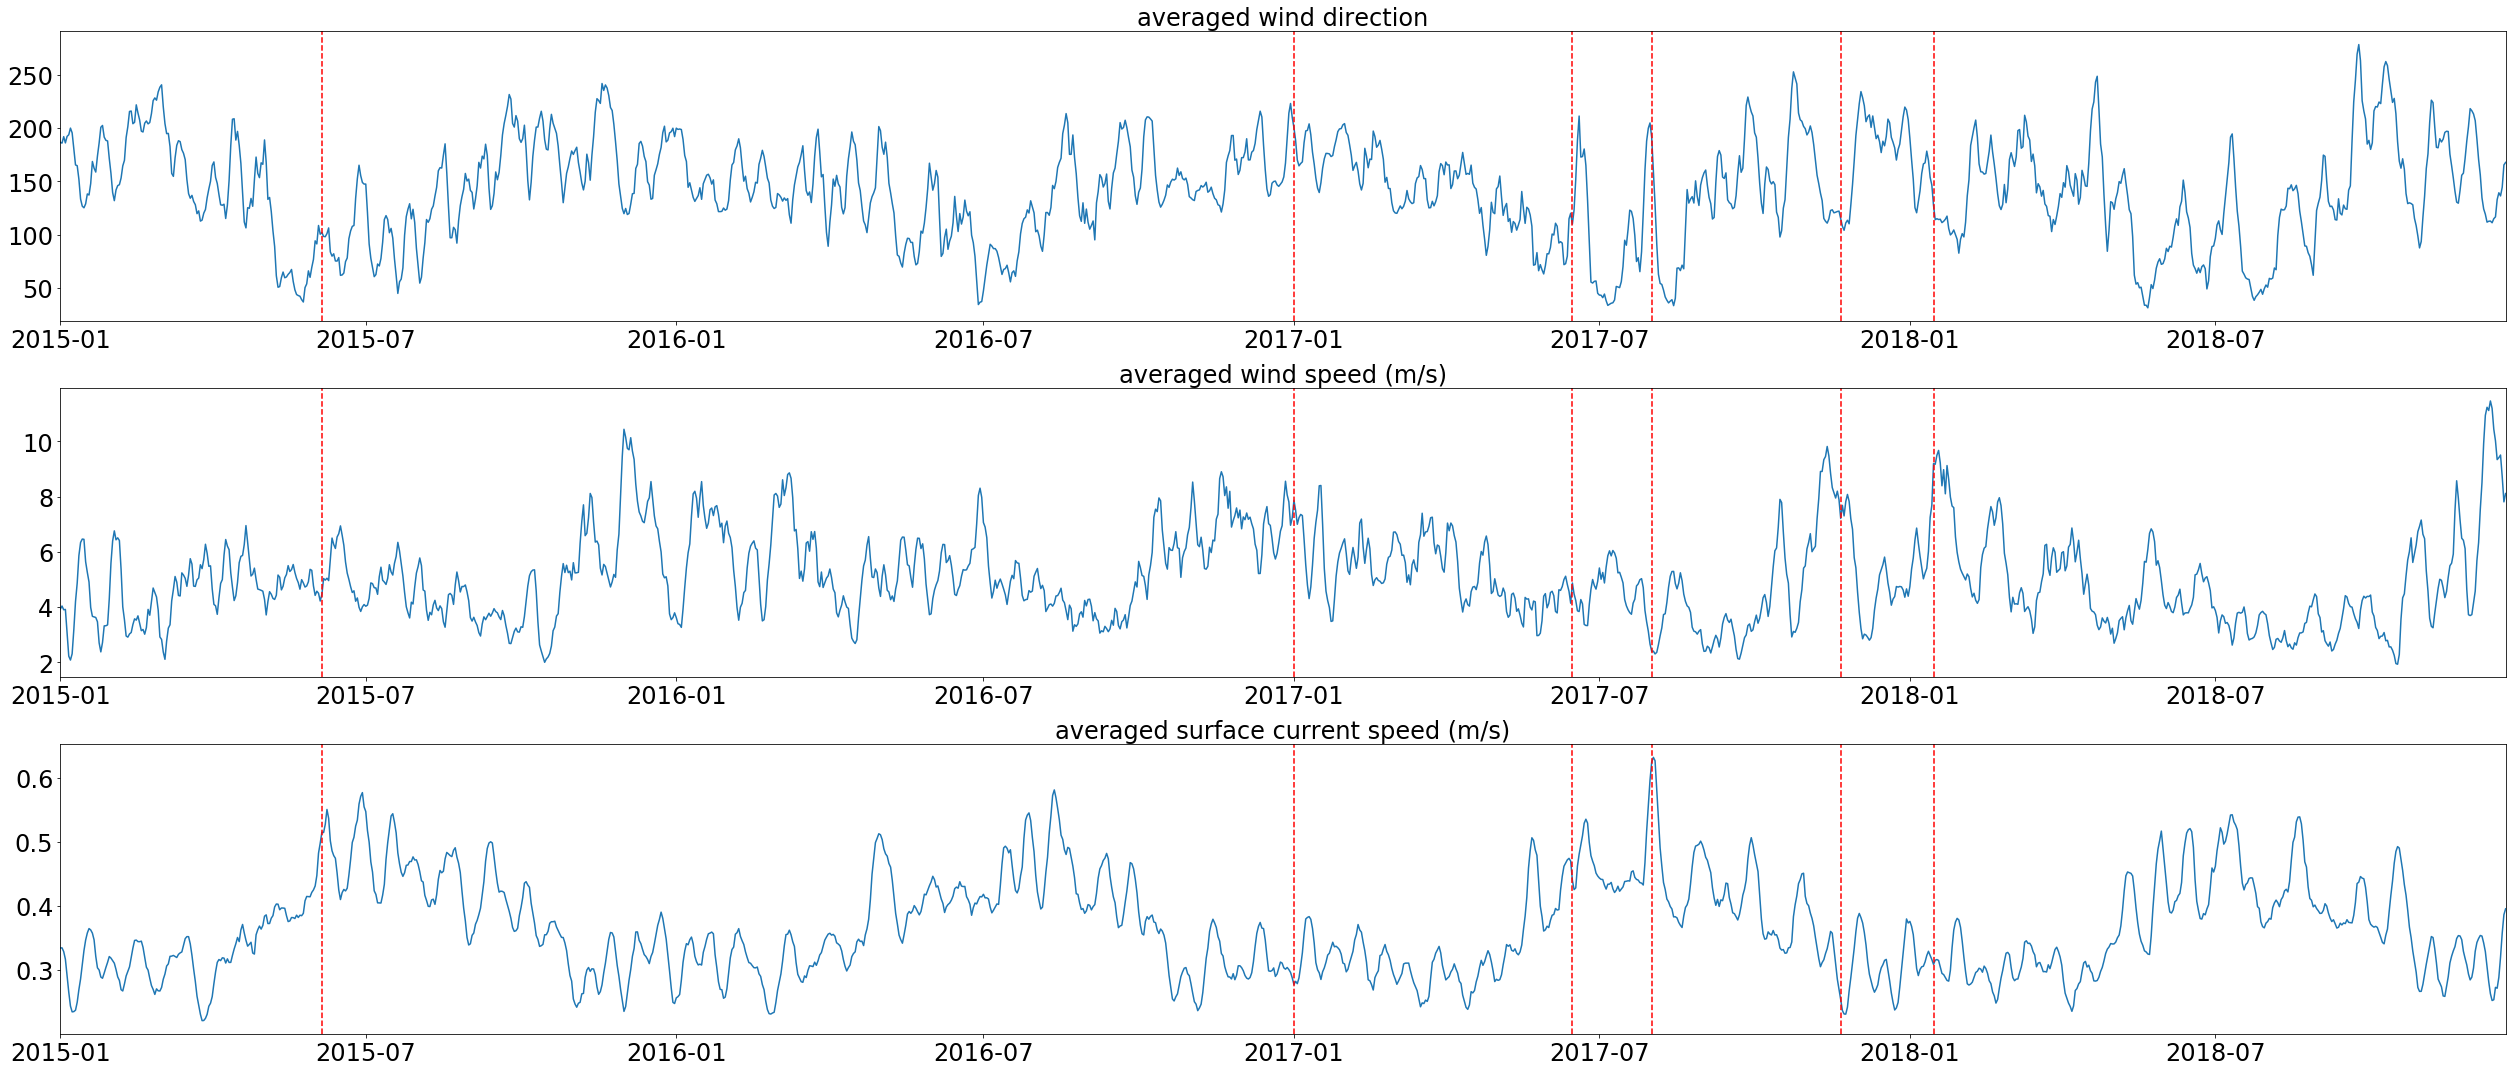

In [26]:
fig, ax = plt.subplots(3,1, figsize = (35,15))
ax[0].plot(dates, wnd_dir_avg)
ax[0].set_title('averaged wind direction', fontsize = 24)
#ax[0].hlines(fulls.mean(), dates[0], dates[-1])

ax[1].plot(dates,wnd_spd_avg)
#ax[1].hlines(fullc.mean(), dates[0], dates[-1])
ax[1].set_title('averaged wind speed (m/s)', fontsize = 24)

ax[2].plot(dates,cur_avg)
ax[2].set_title('averaged surface current speed (m/s)', fontsize = 24)
#ax[2].hlines(full.mean(), dates[0], dates[-1])
for ax in ax:
    ax.set_xlim(dates[0], dates[-1])
    ax.axvline(datetime.date(2017,8,1), color='r', ls='--')
    ax.axvline(datetime.date(2017,1,1), color='r', ls='--');
    ax.axvline(datetime.date(2015,6,5), color='r', ls='--');
    ax.axvline(datetime.date(2018,1,15), color='r', ls='--');
    ax.axvline(datetime.date(2017,6,15), color='r', ls='--');
    ax.axvline(datetime.date(2017,11,21), color='r', ls='--');
    for tick in ax.xaxis.get_major_ticks():
            tick.label.set_fontsize(24); 
    for tick in ax.yaxis.get_major_ticks():
            tick.label.set_fontsize(24); 
            
plt.tight_layout()
#fig.savefig('/home/vdo/Pictures/salmon-choices.png', bbox_inches='tight');